In [109]:
import numpy as np
import pandas as pd
import seaborn as sns

In [110]:
df=pd.read_csv('a1_RestaurantReviews_HistoricDump.tsv',sep='\t')
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
895,I want to first say our server was great and w...,1
896,The pizza selections are good.,1
897,"I had strawberry tea, which was good.",1
898,Highly unprofessional and rude to a loyal patron!,0


In [111]:
df.shape

(900, 2)

In [112]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [113]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [114]:
import re
import nltk  ## natural language tool kit(nltk)

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kabir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [115]:
corpus = []

for i in range(0,900):
    review = re.sub('[^a-zA-Z]',' ',df['Review'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)

In [116]:
corpus

['wow love place',
 'crust not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would not go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place not worth time let alon vega',
 'not like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow

In [117]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1420)

In [118]:
x = cv.fit_transform(corpus).toarray()
y = df.iloc[:,-1].values

In [119]:
x.shape

(900, 1420)

In [120]:
# Saving Bow Dictionary to later use in prediction
# import pickle
# bow_path = ''
# pickle.dump(cv, open(bow_path,"wb"))

In [121]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 0)

In [122]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(X_train,y_train)

GaussianNB()

In [123]:
# Exporting NB classifier to later use in prediction
# import joblib
# joblib.dump(gb,'')

In [124]:
y_pred = gb.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0], dtype=int64)

In [125]:
print("The Predicted value of Y is :")
print(y_pred[:10])
print("The test value of Y is :")
print(np.array(y_test[:10]))
print("The accuracy of GuassianNB is :")
print(gb.score(X_test,y_test))

The Predicted value of Y is :
[0 0 0 0 0 0 1 1 0 0]
The test value of Y is :
[0 0 0 0 0 0 1 1 1 1]
The accuracy of GuassianNB is :
0.7277777777777777


Text(0.5, 1.0, 'Confusion Matrix for GaussianNB')

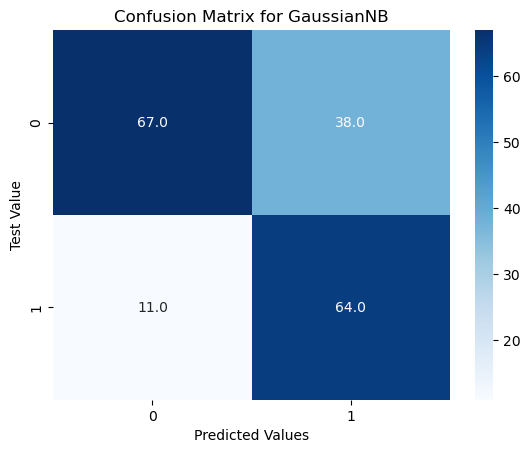

In [126]:
from sklearn.metrics import confusion_matrix,accuracy_score
matrix = confusion_matrix(y_pred,y_test)
sns.heatmap(matrix,annot=True,cmap='Blues',fmt='0.1f')
plt.xlabel("Predicted Values")
plt.ylabel("Test Value")
plt.title("Confusion Matrix for GaussianNB")

In [127]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [128]:
y_pred1 = lr.predict(X_test)
y_pred1

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0], dtype=int64)

In [129]:
print("The Predicted value of Y is :")
print(y_pred1[:10])
print("The test value of Y is :")
print(np.array(y_test[:10]))
print("The accuracy of Logistic Regression is :")
print(lr.score(X_test,y_test))

The Predicted value of Y is :
[0 1 0 1 0 0 1 1 1 0]
The test value of Y is :
[0 0 0 0 0 0 1 1 1 1]
The accuracy of Logistic Regression is :
0.7944444444444444


Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

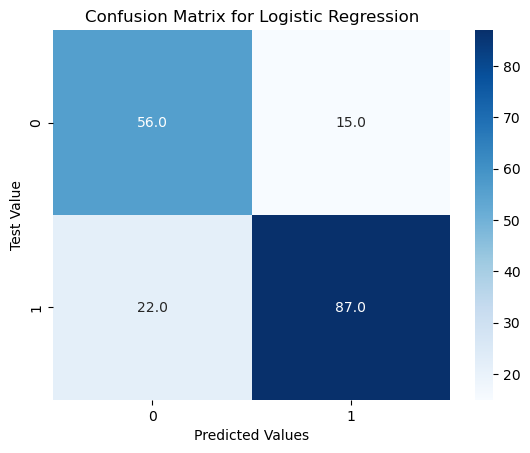

In [130]:
matrix = confusion_matrix(y_pred1,y_test)
sns.heatmap(matrix,annot=True,cmap='Blues',fmt='0.1f')
plt.xlabel("Predicted Values")
plt.ylabel("Test Value")
plt.title("Confusion Matrix for Logistic Regression")

In [131]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [132]:
y_pred2 = svc.predict(X_test)
y_pred2

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0], dtype=int64)

In [133]:
print("The Predicted value of Y is :")
print(y_pred2[:10])
print("The test value of Y is :")
print(np.array(y_test[:10]))
print("The accuracy of Support Vector Machine(SVM) is :")
print(svc.score(X_test,y_test))

The Predicted value of Y is :
[0 1 0 1 0 0 1 1 1 1]
The test value of Y is :
[0 0 0 0 0 0 1 1 1 1]
The accuracy of Support Vector Machine(SVM) is :
0.8166666666666667


Text(0.5, 1.0, 'Confusion Matrix for Support Vector Machine')

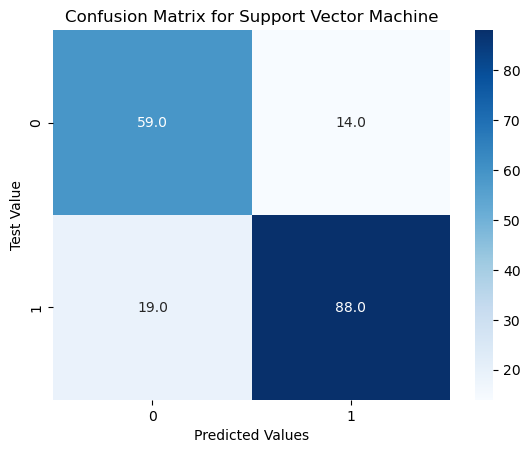

In [134]:
matrix = confusion_matrix(y_pred2,y_test)
sns.heatmap(matrix,annot=True,cmap='Blues',fmt='0.1f')
plt.xlabel("Predicted Values")
plt.ylabel("Test Value")
plt.title("Confusion Matrix for Support Vector Machine")

In [135]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [136]:
y_pred3 = rfc.predict(X_test)
y_pred3

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0], dtype=int64)

In [137]:
print("The Predicted value of Y is :")
print(y_pred3[:10])
print("The test value of Y is :")
print(np.array(y_test[:10]))
print("The accuracy of Random Forest Classifier is :")
print(rfc.score(X_test,y_test))

The Predicted value of Y is :
[0 1 0 1 0 0 1 1 0 0]
The test value of Y is :
[0 0 0 0 0 0 1 1 1 1]
The accuracy of Random Forest Classifier is :
0.7777777777777778


Text(0.5, 1.0, 'Confusion Matrix for Random Forest Classifier')

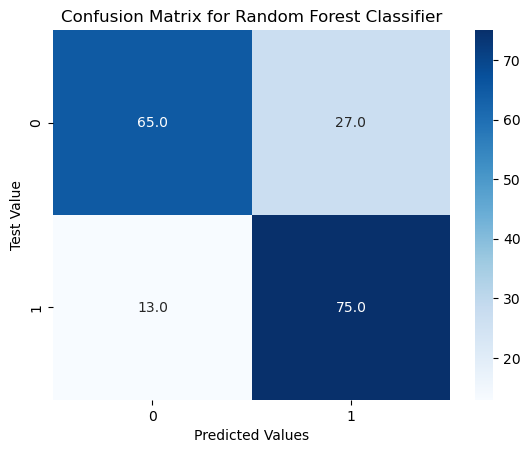

In [138]:
matrix = confusion_matrix(y_pred3,y_test)
sns.heatmap(matrix,annot=True,cmap='Blues',fmt='0.1f')
plt.xlabel("Predicted Values")
plt.ylabel("Test Value")
plt.title("Confusion Matrix for Random Forest Classifier")

In [139]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [140]:
import xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [141]:
y_pred4 = xgb.predict(X_test)
y_pred4

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0])

In [142]:
print("The Predicted value of Y is :")
print(y_pred4[:10])
print("The test value of Y is :")
print(np.array(y_test[:10]))
print("The accuracy of XGBoost is :")
print(rfc.score(X_test,y_test))

The Predicted value of Y is :
[1 1 0 0 0 0 1 1 1 0]
The test value of Y is :
[0 0 0 0 0 0 1 1 1 1]
The accuracy of XGBoost is :
0.7777777777777778


Text(0.5, 1.0, 'Confusion Matrix for XGBoost')

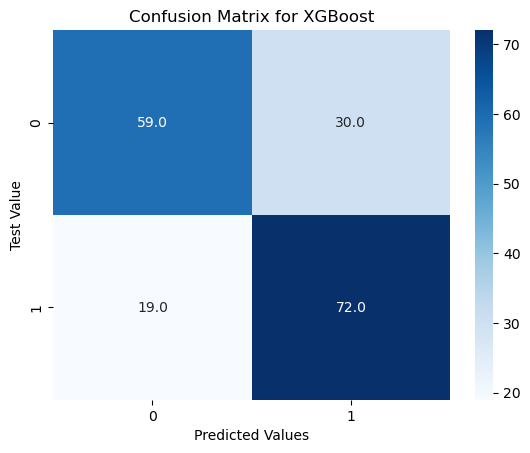

In [143]:
matrix = confusion_matrix(y_pred4,y_test)
sns.heatmap(matrix,annot=True,cmap='Blues',fmt='0.1f')
plt.xlabel("Predicted Values")
plt.ylabel("Test Value")
plt.title("Confusion Matrix for XGBoost")

In [145]:
# Function to preprocess and predict new input
def predict_new_review(review, model, vectorizer):
    # Convert input into the same preprocessed form as training
    review_cv = vectorizer.transform([review])  # Use transform instead of fit_transform
    review_cv = review_cv.toarray()
    
    # Predict the class using the trained model
    prediction = model.predict(review_cv)

    # Output the prediction
    if prediction[0] == 1:
        print("Prediction: Liked (1)")
    else:
        print("Prediction: Not Liked (0)")

# Loop to accept user input for future predictions
while True:
    new_review = input("\nEnter a new review for prediction (or type 'exit' to quit): ")
    
    if new_review.lower() == 'exit':
        print("Exiting prediction loop.")
        break
    
    # Make a prediction for the new review
    predict_new_review(new_review,svc, cv)


Enter a new review for prediction (or type 'exit' to quit):  bad one


Prediction: Not Liked (0)



Enter a new review for prediction (or type 'exit' to quit):  good one


Prediction: Liked (1)



Enter a new review for prediction (or type 'exit' to quit):  fine


Prediction: Liked (1)



Enter a new review for prediction (or type 'exit' to quit):  fresh food


Prediction: Liked (1)



Enter a new review for prediction (or type 'exit' to quit):  unhealthy food


Prediction: Not Liked (0)



Enter a new review for prediction (or type 'exit' to quit):  very lazy service


Prediction: Liked (1)



Enter a new review for prediction (or type 'exit' to quit):  lazy


Prediction: Liked (1)



Enter a new review for prediction (or type 'exit' to quit):  disgusting food


Prediction: Not Liked (0)



Enter a new review for prediction (or type 'exit' to quit):  unhygiengic


Prediction: Liked (1)



Enter a new review for prediction (or type 'exit' to quit):  spicy food


Prediction: Not Liked (0)



Enter a new review for prediction (or type 'exit' to quit):  untasty


Prediction: Liked (1)


KeyboardInterrupt: Interrupted by user